#### **Step 1** Merge datasets

In [1]:
# --- Import libraries ---
import pandas as pd

# --- Load Excel file ---
file_path = r'C:\Users\sanch\Documents\CareerFoundry\Achievement 6\1. Data\student_rolls_1.xlsx'
excel_file = pd.ExcelFile(file_path)

# --- Combine all sheets into one DataFrame ---
all_data = []

for sheet in excel_file.sheet_names:
    # Read each year sheet, skipping metadata rows
    df = pd.read_excel(file_path, sheet_name=sheet, skiprows=3)
    
    # Add a Year column (convert to int)
    df["Year"] = int(sheet)
    
    # Append to list
    all_data.append(df)

# Concatenate all years
df_all = pd.concat(all_data, ignore_index=True)

# Move the "Year" column forward
key_cols = ["School ID", "School Name", "Year"]
df_all = df_all[key_cols + [col for col in df_all.columns if col not in key_cols]]

# Rename columns for clarity
df_all = df_all.rename(columns={"Total  ": "Total Roll"})
df_all = df_all.rename(columns={"Gender": "School Gender"})
df_all = df_all.rename(columns={"Type": "School Type"})
df_all = df_all.rename(columns={"Authority": "School Authority"})

In [2]:
# --- Save the merged dataset ---
df_all.to_csv("Merged_2010_2024.csv", index=False)

#### **Step 2** Data Preparation

In [3]:
# --- Inspect the descriptive statistics of the merged dataset ---
df_all.describe()

,School ID,Year,Decile,Total Roll,Māori,Pacific,Asian,MELAA,Other,European/ Pākehā,...,Year 14,Year 15,Level 1,Level 2,Level 3,Level 4A,Level 4B,Level 5,Taha Māori,None
count,38119.000000,38119.000000,33048.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,...,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000
mean,2029.854430,2016.985467,6.755174,313.675333,74.729400,30.775519,39.641727,6.368688,2.912721,155.610404,...,0.555550,0.443453,5.813925,2.196175,3.109893,3.892599,13.010047,49.328078,132.307091,97.710538
std,1285.718181,4.327598,11.363063,371.165181,95.177185,80.216172,95.309272,13.120339,10.812378,219.202934,...,15.978815,13.357273,26.717629,12.650362,19.359861,27.550723,52.877122,117.900132,186.549361,321.183850
min,1.000000,2010.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000
25%,1168.000000,2013.000000,3.000000,89.000000,18.000000,1.000000,1.000000,0.000000,0.000000,22.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1908.000000,2017.000000,5.000000,207.000000,44.000000,6.000000,8.000000,1.000000,0.000000,83.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,0.000000
75%,2961.000000,2021.000000,8.000000,411.000000,97.000000,23.000000,34.000000,7.000000,2.000000,207.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,211.000000,0.000000
max,6980.000000,2024.000000,99.000000,9164.000000,3128.000000,1316.000000,1781.000000,226.000000,697.000000,4700.000000,...,1206.000000,1500.000000,461.000000,240.000000,631.000000,625.000000,1340.000000,1113.000000,1561.000000,7735.000000


##### **Observation:** 
The "Decile" contains maximum values of 99.
In the Ministry of Education School Rolls dataset, Decile values of 99 are not valid deciles.
They are a missing-value code used internally by the Ministry.

In [4]:
# Identify missing values for df_all.csv
df_all.isnull().sum()

School ID                         0
School Name                       0
Year                              0
Decile                         5071
School Type                       0
                              ...  
Level 5                           0
Taha Māori                        0
None                              0
Takiwā                        33048
Another Gender/ Not Stated    33048
Length: 67, dtype: int64

##### **Observation:** 
Missing values in "Decile" should be handled because they are relevant to the analysis. The missing values in "Takiwā" or "Another Gender/ Not Stated" will be ignored because these two columns will not be used for analysis.

#### **Step 3** Data Cleaning

In [5]:
import numpy as np

# 1) Replace '99' with NaN (MoE missing-code) if applicable
df_all["Decile"] = pd.to_numeric(df_all["Decile"], errors="coerce").replace(99, np.nan)

In [6]:
# 2) Identify rows with missing Decile
missing_rows = df_all[df_all["Decile"].isna()]

In [7]:
missing_rows

,School ID,School Name,Year,Decile,School Type,School Authority,School Gender,Regional Council,Education Region,TA with Auckland Local Board,...,Level 1,Level 2,Level 3,Level 4A,Level 4B,Level 5,Taha Māori,None,Takiwā,Another Gender/ Not Stated
50,52,Tyndale Park Christian School,2010,NaN,Composite (Year 1-15),Private: Fully Reg.,Co-Ed,Auckland Region,Auckland,Auckland- Howick,...,0,0,0,0,0,0,0,140,NaN,NaN
313,345,Pacific Christian School,2010,NaN,Full Primary,Private: Fully Reg.,Co-Ed,Auckland Region,Auckland,Auckland- Mangere-Otahuhu,...,0,0,0,0,0,0,0,109,NaN,NaN
372,425,Odyssey House School (Auckland),2010,NaN,Secondary (Year 9-15),Private: Fully Reg.,Co-Ed,Auckland Region,Auckland,Auckland- Whau,...,0,0,0,0,0,0,0,29,NaN,NaN
384,453,Kadimah School,2010,NaN,Full Primary,State: Integrated,Co-Ed,Auckland Region,Auckland,Auckland- Waitemata,...,0,0,0,0,0,0,101,0,NaN,NaN
386,456,Pukekohe Christian School,2010,NaN,Composite (Year 1-15),Private: Fully Reg.,Co-Ed,Auckland Region,Auckland,Auckland- Franklin,...,0,0,0,0,0,0,0,191,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38114,6975,Garin College,2024,NaN,Secondary (Year 9-15),State: Integrated,Co-Ed,Nelson Region,"Nelson, Marlborough, West Coast",Nelson City,...,0,0,0,0,29,153,0,425,Te Tai Runga,0
38115,6976,Rototuna Primary School,2024,NaN,Contributing,State: Not integrated,Co-Ed,Waikato Region,Waikato,Hamilton City,...,0,0,0,0,0,0,758,0,Te Tai Whenua,0
38116,6977,Hobsonville Point Secondary School,2024,NaN,Secondary (Year 9-15),State: Not integrated,Co-Ed,Auckland Region,Tāmaki Herenga Tāngata,Auckland- Upper Harbour,...,0,0,0,0,50,104,0,653,Te Tai Raro,11
38117,6978,Reremoana Primary School,2024,NaN,Full Primary,State: Not integrated,Co-Ed,Auckland Region,Tāmaki Herenga Waka,Auckland- Manurewa,...,0,0,0,0,0,85,319,0,Te Tai Raro,0


In [8]:
# 3) For each School ID, check if any other year has a Decile
has_decile_elsewhere = (
    df_all
    .groupby("School ID")["Decile"]
    .apply(lambda s: s.notna().any())
    .rename("HasDecileInAnyYear")
    .reset_index()
)

In [9]:
# 4) Attach that flag back to the rows with missing Decile
missing_rows = missing_rows.merge(has_decile_elsewhere, on="School ID", how="left")

In [10]:
# 5) Split into two lists:
#    A) Schools that DO have a Decile somewhere (can be imputed)
#    B) Schools that NEVER have a Decile in any year (likely private/special)
can_impute = missing_rows[missing_rows["HasDecileInAnyYear"] == True]
never_had_decile = missing_rows[missing_rows["HasDecileInAnyYear"] != True]

In [11]:
print("🔹 Rows missing Decile but CAN be imputed from school history:")
print(can_impute[["School ID","School Name","Year","School Authority"]].drop_duplicates().head(50))

🔹 Rows missing Decile but CAN be imputed from school history:
     School ID                            School Name  Year  \
3          453                         Kadimah School  2010   
7          481              City Impact Church School  2010   
14         617  City Impact Church School (Secondary)  2010   
15         620                         Huanui College  2010   
19         627                        Chapman College  2010   
22        1655                         Destiny School  2010   
23        4101             Carncot Independent School  2010   
30         481              City Impact Church School  2011   
35         605                      Wentworth Primary  2011   
36         610                      Seven Oaks School  2011   
38         617  City Impact Church School (Secondary)  2011   
39         620                         Huanui College  2011   
42         627                        Chapman College  2011   
45        1655                         Destiny School  2

In [12]:
print("\n🔹 Rows missing Decile and NEVER had a Decile in any year (keep/drop):")
print(never_had_decile[["School ID","School Name","Year","School Authority"]].drop_duplicates().head(50))


🔹 Rows missing Decile and NEVER had a Decile in any year (keep/drop):
    School ID                           School Name  Year  \
0          52         Tyndale Park Christian School  2010   
1         345              Pacific Christian School  2010   
2         425       Odyssey House School (Auckland)  2010   
4         456             Pukekohe Christian School  2010   
5         462                    Ambury Park Centre  2010   
6         466              Manukau Christian School  2010   
8         486       Cambridge International College  2010   
9         498              Te Aho o Te Kura Pounamu  2010   
10        547                             MindAlive  2010   
11        575    Auckland Montessori Primary School  2010   
12        604                   Golden Grove School  2010   
13        611          Hutt Valley Christian School  2010   
16        621                       Destiny College  2010   
17        622         Silverstream Christian School  2010   
18        623 

In [13]:
# 6) Impute Decile where possible (median per School ID)
df_all = df_all.sort_values(["School ID", "Year"])
df_all["Decile"] = (
    df_all
    .groupby("School ID")["Decile"]
    .transform(lambda s: s.fillna(s.median()))
)

In [14]:
# Check if there are still missing values
df_all.isnull().sum()

School ID                         0
School Name                       0
Year                              0
Decile                          358
School Type                       0
                              ...  
Level 5                           0
Taha Māori                        0
None                              0
Takiwā                        33048
Another Gender/ Not Stated    33048
Length: 67, dtype: int64

##### **Note.** 
All 358 records in "Decile" column that contain missing values are private, special, or newly established schools that were not assigned a decile. They will be omitted since they are irrelevant to the analysis.

In [15]:
# Delete the 358 schools without a decile
df_all = df_all.dropna(subset=["Decile"])

In [16]:
df_all.shape

(37761, 67)

#### Check for outliers

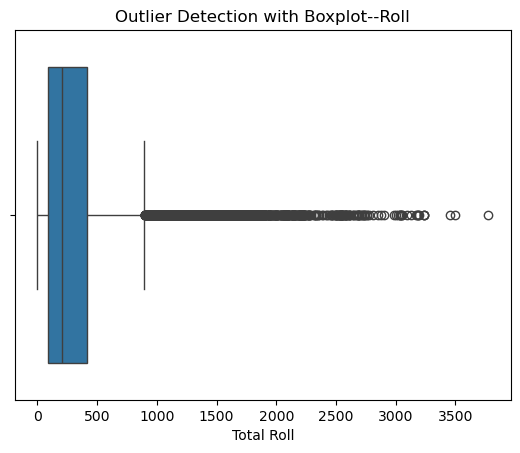

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df_all['Total Roll'])
plt.title('Outlier Detection with Boxplot--Roll')
plt.show()

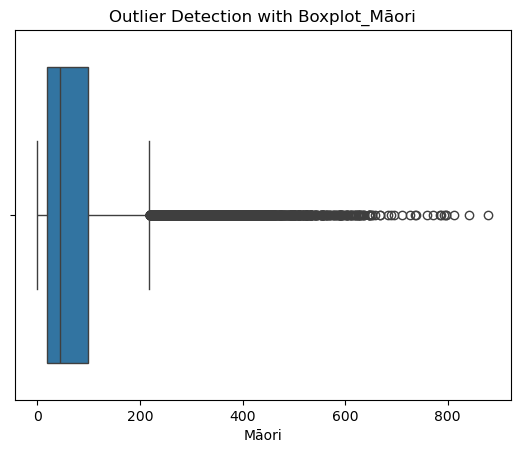

In [18]:
sns.boxplot(x=df_all['Māori'])
plt.title('Outlier Detection with Boxplot_Māori')
plt.show()

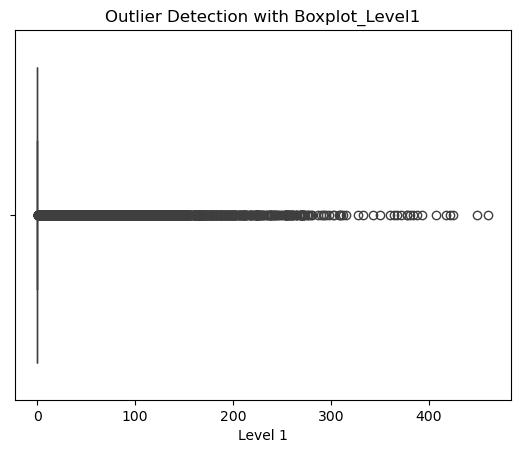

In [19]:
sns.boxplot(x=df_all['Level 1'])
plt.title('Outlier Detection with Boxplot_Level1')
plt.show()

**Observation** 
There are outliers in "Decile", "Māori", "Level 1". However, removing these outliers would risk information loss and reduce the representativeness of the dataset. Instead, their impact will be considered during interpretation and visualized appropriately (e.g., via boxplots or log scaling if needed).

#### **Step 4** Delete the irrelevant columns

In [20]:
# --- Inspect the columns of the merged dataset ---
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37761 entries, 0 to 38118
Data columns (total 67 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   School ID                     37761 non-null  int64  
 1   School Name                   37761 non-null  object 
 2   Year                          37761 non-null  int64  
 3   Decile                        37761 non-null  float64
 4   School Type                   37761 non-null  object 
 5   School Authority              37761 non-null  object 
 6   School Gender                 37761 non-null  object 
 7   Regional Council              37761 non-null  object 
 8   Education Region              37761 non-null  object 
 9   TA with Auckland Local Board  37761 non-null  object 
 10  Total Roll                    37761 non-null  int64  
 11  Female                        37761 non-null  object 
 12  Male                          37761 non-null  object 
 13  Māori 

In [21]:
# --- Check the columns to be deleted ---
df_all.columns[[8, 9, 11, 12, 65, 66]]

Index(['Education Region', 'TA with Auckland Local Board', 'Female', 'Male',
       'Takiwā', 'Another Gender/ Not Stated'],
      dtype='object')

In [22]:
df_all.columns[24:57]

Index(['Year 1', 'Year 2', 'Year 3', 'Year 4', 'Year 5', 'Year 6', 'Year 7',
       'Year 8', 'Year 9', 'Year 10', 'Year 11', 'Year 12', 'Year 13',
       'Year 14', 'Year 15', 'Age 5', 'Age 6', 'Age 7', 'Age 8', 'Age 9',
       'Age 10', 'Age 11', 'Age 12', 'Age 13', 'Age 14', 'Age 15', 'Age 16',
       'Age 17', 'Age 18', 'Age 19', 'Age 20', 'Age 21', 'Age 22+'],
      dtype='object')

In [23]:
# --- Delete the unhelpful columns ---
cols_to_drop = list(df_all.columns[[8, 9, 11, 12, 65, 66]]) + list(df_all.columns[24:57])
df_all = df_all.drop(columns=cols_to_drop)

In [24]:
# --- Confirm the deletion ---
df_all.head()

,School ID,School Name,Year,Decile,School Type,School Authority,School Gender,Regional Council,Total Roll,Māori,...,International Fee Paying.1,Secondary-Tertiary Programme,Level 1,Level 2,Level 3,Level 4A,Level 4B,Level 5,Taha Māori,None
0,1,Te Kura o Te Kao,2010,2.0,Full Primary,State: Not integrated,Co-Ed,Northland Region,27,27,...,0,0,0,0,0,10,17,0,0,0
2577,1,Te Kura o Te Kao,2011,2.0,Full Primary,State: Not integrated,Co-Ed,Northland Region,30,30,...,0,0,0,0,0,30,0,0,0,0
5145,1,Te Kura o Te Kao,2012,2.0,Full Primary,State: Not integrated,Co-Ed,Northland Region,26,26,...,0,0,0,0,26,0,0,0,0,0
7703,1,Te Kura o Te Kao,2013,2.0,Full Primary,State: Not integrated,Co-Ed,Northland Region,31,31,...,0,0,0,0,31,0,0,0,0,0
10241,1,Te Kura o Te Kao,2014,2.0,Full Primary,State: Not integrated,Co-Ed,Northland Region,32,32,...,0,0,14,18,0,0,0,0,0,0


#### **Step 3** Check the duplicates and mix datatypes

In [25]:
# Find duplicates for df_all.csv
df_dups = df_all[df_all.duplicated()]

In [26]:
df_dups

,School ID,School Name,Year,Decile,School Type,School Authority,School Gender,Regional Council,Total Roll,Māori,...,International Fee Paying.1,Secondary-Tertiary Programme,Level 1,Level 2,Level 3,Level 4A,Level 4B,Level 5,Taha Māori,None


In [27]:
# Find columns that contain mixed datatypes
for col in df_all.columns.tolist():
  weird = (df_all[[col]].map(type) != df_all[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_all[weird]) > 0:
    print (col)

**Observation:** No duplicates or mix datatypes are found.

In [28]:
df_all.describe()

,School ID,Year,Decile,Total Roll,Māori,Pacific,Asian,MELAA,Other,European/ Pākehā,...,International Fee Paying.1,Secondary-Tertiary Programme,Level 1,Level 2,Level 3,Level 4A,Level 4B,Level 5,Taha Māori,None
count,37761.000000,37761.000000,37761.000000,37761.000000,37761.000000,37761.000000,37761.000000,37761.000000,37761.000000,37761.000000,...,37761.000000,37761.000000,37761.000000,37761.000000,37761.000000,37761.00000,37761.000000,37761.000000,37761.000000,37761.000000
mean,2041.724795,2016.976696,5.460263,313.193665,74.464500,30.887159,39.784963,6.376685,2.837875,155.185191,...,3.657318,2.094807,5.854983,2.194010,3.130584,3.91899,12.801462,49.742592,133.323588,95.936336
std,1284.704557,4.328284,2.936712,348.899495,86.145113,80.414360,95.563005,13.027208,10.087351,206.643582,...,17.721445,10.856763,26.818717,12.584648,19.439933,27.66678,50.483568,118.324656,187.024999,301.867787
min,1.000000,2010.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-19.000000
25%,1194.000000,2013.000000,3.000000,91.000000,18.000000,1.000000,1.000000,0.000000,0.000000,23.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,1927.000000,2017.000000,5.000000,209.000000,45.000000,6.000000,8.000000,1.000000,0.000000,84.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,40.000000,0.000000
75%,2966.000000,2021.000000,8.000000,413.000000,98.000000,23.000000,34.000000,7.000000,2.000000,208.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,26.000000,213.000000,0.000000
max,6980.000000,2024.000000,10.000000,3775.000000,879.000000,1316.000000,1781.000000,223.000000,697.000000,1695.000000,...,690.000000,381.000000,461.000000,240.000000,631.000000,625.00000,773.000000,1113.000000,1561.000000,3345.000000


In [29]:
df_all.head()

,School ID,School Name,Year,Decile,School Type,School Authority,School Gender,Regional Council,Total Roll,Māori,...,International Fee Paying.1,Secondary-Tertiary Programme,Level 1,Level 2,Level 3,Level 4A,Level 4B,Level 5,Taha Māori,None
0,1,Te Kura o Te Kao,2010,2.0,Full Primary,State: Not integrated,Co-Ed,Northland Region,27,27,...,0,0,0,0,0,10,17,0,0,0
2577,1,Te Kura o Te Kao,2011,2.0,Full Primary,State: Not integrated,Co-Ed,Northland Region,30,30,...,0,0,0,0,0,30,0,0,0,0
5145,1,Te Kura o Te Kao,2012,2.0,Full Primary,State: Not integrated,Co-Ed,Northland Region,26,26,...,0,0,0,0,26,0,0,0,0,0
7703,1,Te Kura o Te Kao,2013,2.0,Full Primary,State: Not integrated,Co-Ed,Northland Region,31,31,...,0,0,0,0,31,0,0,0,0,0
10241,1,Te Kura o Te Kao,2014,2.0,Full Primary,State: Not integrated,Co-Ed,Northland Region,32,32,...,0,0,14,18,0,0,0,0,0,0


In [30]:
# --- Save the merged dataset ---
output_path = r"C:\Users\sanch\Documents\CareerFoundry\Achievement 6\1. Data\Merged_Student_Rolls.csv"
df_all.to_csv(output_path, index=False, encoding='utf-8-sig')